In [ ]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np

# データの作成



In [2]:
c = 2
phi = 0.8
var = 4

ini_y = 13

T = 10000

y = np.zeros(T)
x = np.zeros(T)

# 再現性のためあらかじめ作成しておく
np.random.seed(seed=5)
eps = np.random.normal(loc = 0, scale = np.sqrt(var),size  = T)

y[0] = ini_y
for t in range(1,T):
    y[t] = c + phi * y[t-1] + eps[t]

   

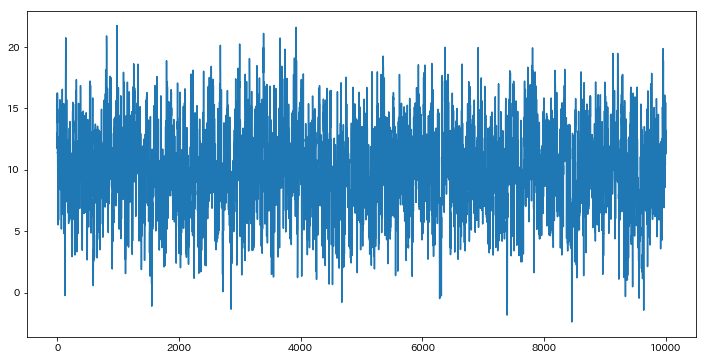

In [3]:
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(1, 1, 1)
ax.plot(y)
plt.show()


# ライブラリによる推定

In [4]:
# モデルの生成
model = sm.tsa.AR(y)

# AICでモデルの次数を選択
order = model.select_order(maxlag=3, ic='aic')
print("次数は{}".format(order))

# 推定
model_fit = model.fit(maxlag=order)

print("パラメタは")
print(model_fit.params)
print("分散は")
print(model_fit.sigma2)


次数は1
パラメタは
[ 1.96645804  0.80328776]
分散は
4.00700334366


# 自作の最尤推定

In [5]:
y
    

array([ 13.        ,  11.7382597 ,  16.25215013, ...,  13.21327125,
        13.16606177,  12.65509499])

In [6]:
T = len(y)
upper = np.sum([(y[i] - np.mean(y[:i]))* (y[i-1] - np.mean(y[:i-1])) for i in range(2,T)])
downer = np.sum([(y[i-1] - np.mean(y[:i-1]))**2 for i in range(2,T)])
phi_hat = upper/downer
c_hat = np.mean(y[:T])  - phi_hat * np.mean(y[:T-1])
v_hat = np.mean([(y[t] - c_hat - phi_hat * y[t-1])**2 for t in range(1,T)])
s_hat = np.sqrt(v_hat)

In [7]:
class AR():
    
    def __init__(self):
        pass
    
    def fit(self,y):
        T = len(y)
        # 愚直に計算
        upper = np.sum([(y[i] - np.mean(y[:i]))* (y[i-1] - np.mean(y[:i-1])) for i in range(2,T)])
        downer = np.sum([(y[i-1] - np.mean(y[:i-1]))**2 for i in range(2,T)])
        # upper = np.sum([(y[i])* (y[i-1] ) for i in range(2,T)])
        # downer = np.sum([(y[i-1])**2 for i in range(2,T)])
        self.phi_hat = upper/downer
        self.c_hat = np.mean(y[:T])  - self.phi_hat * np.mean(y[:T-1])
        self.v_hat = np.mean([(y[t] - self.c_hat - self.phi_hat * y[t-1])**2 for t in range(1,T)])
        self.s_hat = np.sqrt(self.v_hat)
        
    def show_equation(self):
        
        print(" y[t] = {:.2f} + {:.2f} * y[t-1] + e      e ~ N(0,{:.2f})".format(self.c_hat, self.phi_hat,self.v_hat))
        

In [8]:
model = AR()


In [9]:
model.fit(y)

In [10]:
model.show_equation()

 y[t] = 1.97 + 0.80 * y[t-1] + e      e ~ N(0,4.01)


In [11]:
from statsmodels.tsa.tsatools import lagmat
import numpy as np
X = y[:-1]
Y = y[1:]
# lagmat(X, maxlag=2,trim='forward', original='ex')

(1/np.dot(X.T , X))  *np.dot(X.T , Y)

0.98001925861414529

# AR(2)の推定

In [12]:
c = 2
phi = 0.2
phi2 = 0.3
var = 4

ini_y = 13

T = 10000

y = np.zeros(T)
x = np.zeros(T)

# 再現性のためあらかじめ作成しておく
np.random.seed(seed=5)
eps = np.random.normal(loc = 0, scale = np.sqrt(var),size  = T)

y[0] = ini_y
for t in range(2,T):
    y[t] = c + phi * y[t-1] + phi2 * y[t-2] + eps[t]

# モデルの生成
model = sm.tsa.AR(y)

# AICでモデルの次数を選択
order = model.select_order(maxlag=3, ic='aic')
print("次数は{}".format(order))

# 推定
model_fit = model.fit(maxlag=order) 

print("パラメタは")
print(model_fit.params)
print("分散は")
print(model_fit.sigma2)


次数は2
パラメタは
[ 1.9869473   0.2051959   0.29791684]
分散は
4.00736207654


In [13]:
X

array([ 13.        ,  11.7382597 ,  16.25215013, ...,  11.28069916,
        13.21327125,  13.16606177])

# ユールウォーカー方程式でとく

In [14]:
r = np.corrcoef([y[:-1], y[1:]])

In [15]:
r

array([[ 1.        ,  0.29094601],
       [ 0.29094601,  1.        ]])

In [16]:
inv_r = np.linalg.inv(r)

In [20]:
r_2 = np.corrcoef([y[:-2], y[1:-1],y[2:]])[:,0][1:]

In [21]:
np.dot(inv_r,r_2)

array([ 0.20407351,  0.29854548])

# AR(3)の実装

In [146]:
c = 2
phi = 0.2
phi2 = 0.3
phi3 = 0.1
var = 4

ini_y = 13

T = 10000

y = np.zeros(T)
x = np.zeros(T)

# 再現性のためあらかじめ作成しておく
np.random.seed(seed=5)
eps = np.random.normal(loc = 0, scale = np.sqrt(var),size  = T)

y[0] = ini_y
for t in range(3,T):
    y[t] = c + phi * y[t-1] + phi2 * y[t-2]+ phi3 * y[t-3] + eps[t]

# モデルの生成
model = sm.tsa.AR(y)

# AICでモデルの次数を選択
order = model.select_order(maxlag=4, ic='aic')
print("次数は{}".format(order))

# 推定
model_fit = model.fit(maxlag=order) 

print("パラメタは")
print(model_fit.params)
print("分散は")
print(model_fit.sigma2)



次数は3
パラメタは
[ 1.98158597  0.20704322  0.29764317  0.09878037]
分散は
4.00531224028


In [147]:
model_fit.aic

1.3886218401877417

# ユールウォーカー方程式

r = np.corrcoef([y[:-2], y[1:-1], y[2:]])
inv_r = np.linalg.inv(r)
r_2 = np.corrcoef([y[:-3],y[1:-2], y[2:-1],y[3:]])[:,0][1:]
np.dot(inv_r,r_2)

In [23]:
length = len(y)

p = 3
inv_r = np.linalg.inv(np.corrcoef([y[i:length - p + i +  1] for i in range(p)]))

In [24]:
r_2 = np.corrcoef([y[i:length - p + i ] for i in range(p + 1)])[:,0][1:]

In [25]:
np.dot(inv_r,r_2)

array([ 0.20691383,  0.29676973,  0.09896403])

In [133]:
class YW_AR():
    
    def __init__(self,p):
        self.p = p
    
    def __repr__(self):
        return "AR({}) object".format(self.p)
    
    def fit(self,y):
        length = len(y)
        p = self.p
        inv_r = np.linalg.inv(np.corrcoef([y[i:length - p + i +  1] for i in range(p)]))
        r_2 = np.corrcoef([y[i:length - p + i ] for i in range(p + 1)])[:,0][1:]
        self.params = np.dot(inv_r,r_2)
        self.mu = np.mean(y) - np.dot(self.params, [np.mean(y[:length-i]) for i in range(p)])
        self.v_hat = np.mean([(y[i] - self.mu - np.dot(np.array([y[i-j] for j in range(1,p+1)]),self.params))**2 for i in range(p,length)])
        
    def show_model(self):
        st = "y[t] = {:.2f}".format(self.mu)
        for i in range(1,self.p+1):
            st+=" + {:.2f} * y[t{}]".format(self.params[i-1],-i)
        st+=" + e      e ~ N(0,{:.2f})".format(self.v_hat)
        print(st)
        

In [134]:
model = YW_AR(p=3)

In [135]:
model.fit(y)

In [136]:
model.show_model()

y[t] = 1.99 + 0.21 * y[t-1] + 0.30 * y[t-2] + 0.10 * y[t-3] + e      e ~ N(0,4.01)
